In [1]:
# Point to configuration files
import sys
sys.path.append('/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2')
# Import python packages required for analysis
from setup import *
# Import CAF Plotting libraries
import plot_manager
importlib.reload(plot_manager)

DUNE plot style enabled


<module 'plot_manager' from '/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2/plot_manager.py'>

# QUESTION 1

In [2]:
CL, CR, m = 23.9818e-6, 7.6911e-6, 0.5109989461e-3 # Constants
diff_sigma = lambda Ee, Ev : 0.25*np.pi*m*(CL**2 + CL*CR*m*(m-Ee)/Ev**2 + CR**2*(-Ee+m+Ev)**2/Ev**2) # Cross section
dN_dE = lambda Ee : 3*(2*Ev+m)**3*(CL**2*Ev**2+CL*CR*m*(-Ee+m)+CR**2*(-Ee+Ev+m)**2)/(2*Ev**4*(-3*CL*CR*m*(2*Ev+m) + 3*CL**2*(2*Ev+m)**2 + CR**2*(4*Ev**2 + 6*Ev*m + 3*m**2))) # PDF
up_limit = lambda Ev : m + 2*Ev**2/(m+2*Ev) # Upper limit for energy


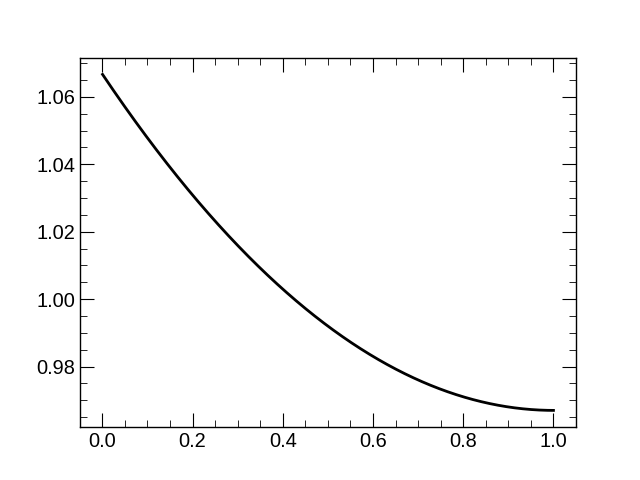
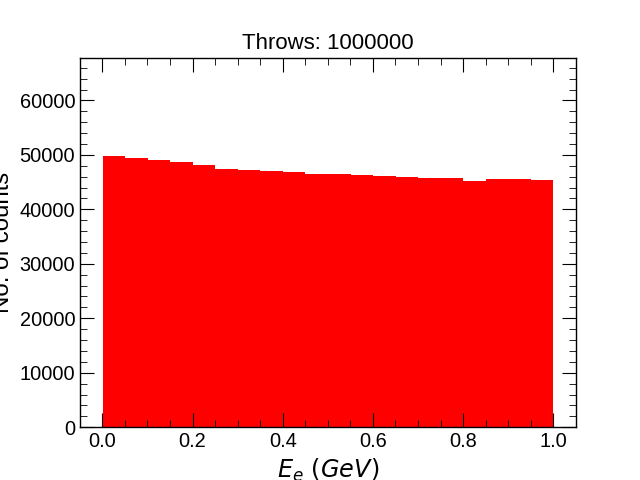


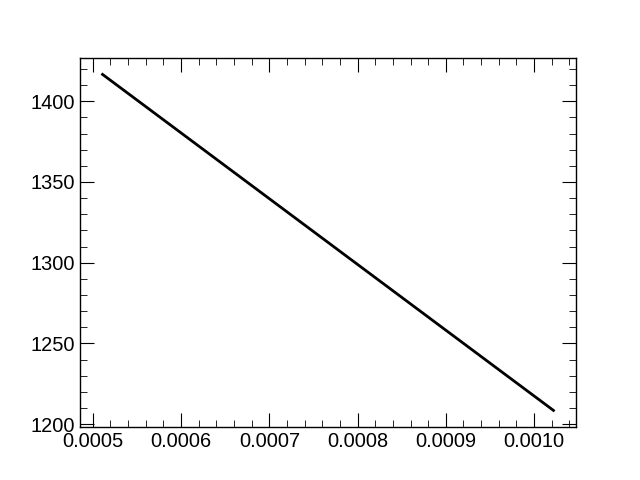
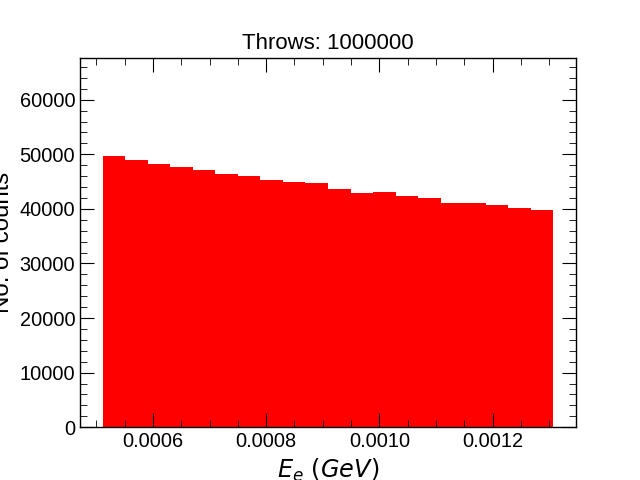

In [5]:
#################### CASE 1: E_e = 1 GeV ########################
Ev = 1 # Define neutrino energy
Ee_array = [] # Initialize array containing electron energies in desired range
throws = 1000000 # Number of throws
Ee_values = np.random.uniform(low=m, high=up_limit(Ev), size=throws) # Generate random dist of electron energies following uniform distro in desired range
max_PDF = max(dN_dE(Ee_values)) # Recover max value of PDF in desired range
uniform_dist = np.random.uniform(low=m, high=max_PDF, size=throws) # Generate random values of the PDF
# Applying accept/reject method
for u, E in zip(uniform_dist, Ee_values): 
    if u <= dN_dE(E):
        Ee_array.append(E)
# Plotting PDF and distribution of energies
plot_manager.display_plots(plot_funcs = {
    'Plot 1' : lambda : plt.plot(np.arange(m,up_limit(Ev),m), dN_dE(np.arange(m,up_limit(Ev),m))),
    'Plot 2': lambda: plot_manager.make_hist(
        data=[Ee_array], 
        bins=20, 
        range=(m, up_limit(Ev)), 
        alpha=1, 
        label=[r'$\pi$'], 
        title=r'Throws: ' + str(throws), 
        xlabel=r'$E_e \ (GeV)$', 
        ylabel='No. of counts',
        legend=False,
        DUNE=False
    )
})

#################### CASE 2: E_e = 1e-3 GeV ########################
Ev = 1e-3
Ee_array = [] # Initialize array containing electron energies in desired range
throws = 1000000 # Number of throws
Ee_values = np.random.uniform(low=m, high=up_limit(Ev), size=throws) # Generate random dist of electron energies following uniform distro in desired range
max_PDF = max(dN_dE(Ee_values)) # Recover max value of PDF in desired range
uniform_dist = np.random.uniform(low=m, high=max_PDF, size=throws) # Generate random values of the PDF
# Applying accept/reject method
for u, E in zip(uniform_dist, Ee_values): 
    if u <= dN_dE(E):
        Ee_array.append(E)
# Plotting PDF and distribution of energies
plot_manager.display_plots(plot_funcs = {
    'Plot 1' : lambda : plt.plot(np.arange(m,up_limit(Ev),m), dN_dE(np.arange(m,up_limit(Ev),m))),
    'Plot 2': lambda: plot_manager.make_hist(
        data=[Ee_array], 
        bins=20, 
        range=(m, up_limit(Ev)), 
        alpha=1, 
        label=[r'$\pi$'], 
        title=r'Throws: ' + str(throws), 
        xlabel=r'$E_e \ (GeV)$', 
        ylabel='No. of counts',
        legend=False,
        DUNE=False
    )
})

In [168]:
# Verifying normalization
from scipy.integrate import quad
Ev = 1
area, error = quad(dN_dE,m,up_limit(Ev))
print("For Ev = 1GeV: ", area)
Ev = 1e-3
area, error = quad(dN_dE,m,up_limit(Ev))
print("For Ev = 1MeV: ", area)

For Ev = 1GeV:  0.9999999999999998
For Ev = 1MeV:  0.9999999999999997


# QUESTION 2

In [251]:
PDF = lambda x,y : 1/(((x-5)**2+y**2)**4 + 1) + 1/(((x+5)**2 + (y+5)**2)**4 + 1)
xrange = np.arange(-10,10,0.1)
yrange = np.arange(-10,10,0.1)

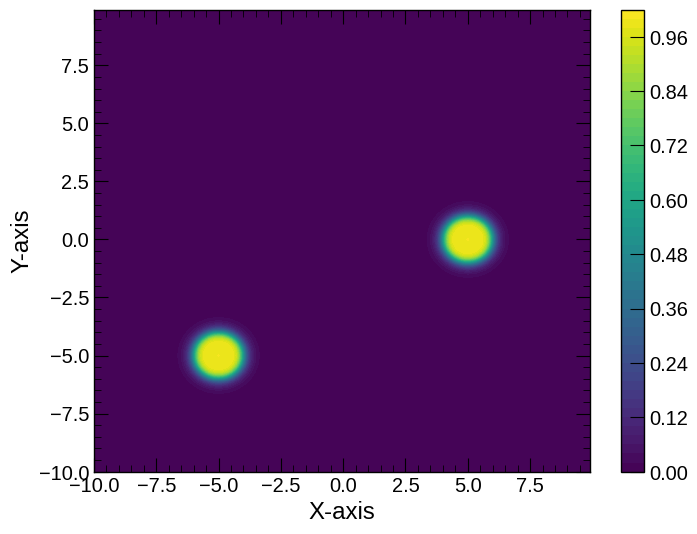

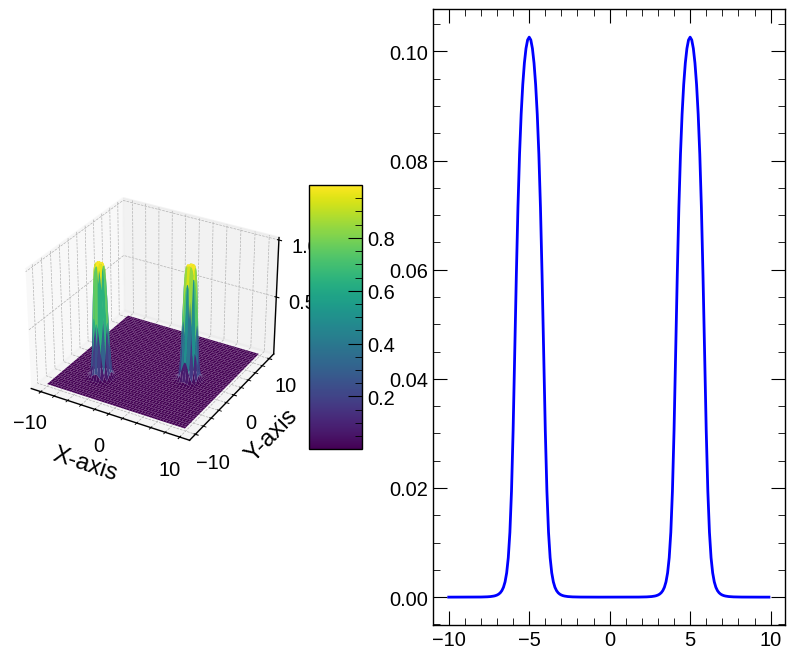

In [196]:
X, Y = np.meshgrid(xrange, yrange) # Meshgrid for the x and y values
Z = PDF(X, Y) # Compute PDF values for range
# Creating bi-dimensional projection plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
# Creating 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none') # Plot the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
Z_proj = np.mean(Z, axis=0)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('PDF Value')
ax2 = fig.add_subplot(122)
ax2.plot(xrange, Z_proj, color='blue')

In [254]:
throws = 10000 # Number of throws
in_val, total_val = 0, 0 # Counting accepted and total values
x_values_region1 = np.random.uniform(low=-10, high=10, size=throws) # Generate uniform random dist of values for x
y_values_region1 = np.random.uniform(low=-10, high=10, size=throws) # Generate uniform random dist of values for y
uniform_dist = np.random.uniform(low=0, high=0.125, size=throws) # Generate random values of the PDF
# Applying accept/reject method
for u, x, y in zip(uniform_dist, x_values_region1, y_values_region1): 
    total_val += 1
    if u <= PDF(x,y):
        in_val += 1 # If accepted, add to counter
# Print efficiency
print(100*in_val/total_val)

3.44


In [253]:
throws = 10000 # Number of throws
in_val, total_val = 0, 0 # Counting accepted and total values
x_values_region1 = np.random.uniform(low=-7, high=7, size=throws) # Generate uniform random dist of values for x
y_values_region1 = np.random.uniform(low=-7, high=-3, size=throws) # Generate uniform random dist of values for y
y_values_region2 = np.random.uniform(low=-2, high=2, size=throws) # Generate uniform random dist of values for y
uniform_dist = np.random.uniform(low=0, high=0.125, size=throws) # Generate random values of the PDF
# Applying accept/reject method for region 1
for u, x in zip(uniform_dist, x_values_region1): 
    if x<0:
        for y in y_values_region1:
            total_val += 1
            if u <= PDF(x,y):
                in_val += 1 # If accepted, add to counter
    if x>0:
        for y in y_values_region2:
            total_val += 1
            if u <= PDF(x,y):
                in_val += 1 # If accepted, add to counter
# Print efficiency
print(100*in_val/total_val)

25.261461


In [255]:
throws = 10000 # Number of throws
in_val, total_val = 0, 0 # Counting accepted and total values
x_values_region1 = np.random.uniform(low=-7, high=-3, size=throws) # Generate uniform random dist of values for x
x_values_region2 = np.random.uniform(low=3, high=7, size=throws) # Generate uniform random dist of values for x
y_values_region1 = np.random.uniform(low=-7, high=-3, size=throws) # Generate uniform random dist of values for y
y_values_region2 = np.random.uniform(low=-2, high=2, size=throws) # Generate uniform random dist of values for y
uniform_dist = np.random.uniform(low=0, high=0.125, size=throws) # Generate random values of the PDF
# Applying accept/reject method for region 1
for u, x, y in zip(uniform_dist, x_values_region1, y_values_region1): 
    total_val += 1
    if u <= PDF(x,y):
        in_val += 1 # If accepted, add to counter 
# Applying accept/reject method for region 2
for u, x, y in zip(uniform_dist, x_values_region2, y_values_region2): 
    total_val += 1 
    if u <= PDF(x,y):
        in_val += 1 # If accepted, add to counter    
# Print efficiency
print(100*in_val/total_val)

43.215
